<a href="https://colab.research.google.com/github/Lahiru-Sanjaya-Lankagama/Transfer_learning/blob/main/Trasfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install keras

In [ ]:
%pip install --upgrade tensorflow


In [ ]:
import os
import datetime
import glob
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt
from tensorflow.keras import layers
from PIL import Image

In [ ]:
network = tf.keras.applications.resnet50.ResNet50(weights = "imagenet")

102967424/102967424 [==============================] - 0s 0us/step


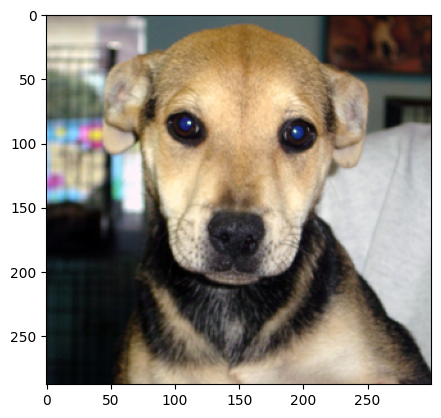

In [ ]:
img = Image.open("/content/4.jpg")
im = np.array(img)
plt.imshow(im)

In [ ]:
im.shape

(288, 300, 3)

image can be cropped or resize. Both ways have drawbacks.
resnet50 want (224, 224, 3) images


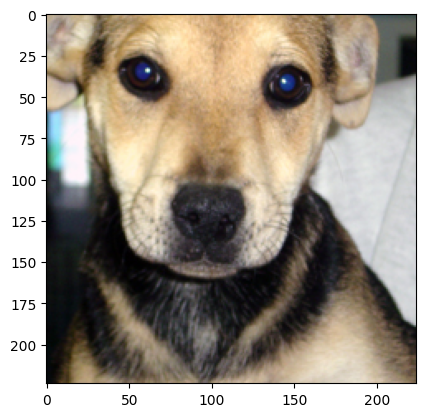

In [ ]:
i,j = 50,50
cropped_im = im[i:i+224, j:j+224]
plt.imshow(cropped_im)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cropped_im.shape

(224, 224, 3)

In [ ]:
processed_im = tf.keras.applications.resnet50.preprocess_input(tf.cast(cropped_im, tf.float32))

In [ ]:
processed_im.shape

TensorShape([224, 224, 3])

add batch dimension

In [ ]:
processed_im[np.newaxis,...].shape

TensorShape([1, 224, 224, 3])

In [ ]:
probs = network(processed_im[np.newaxis,...])

<StemContainer object of 3 artists>

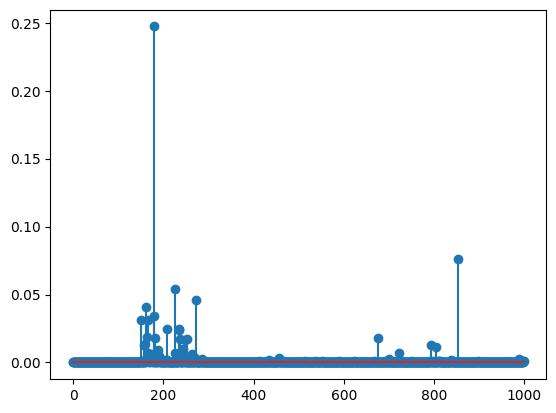

In [ ]:
plt.stem(probs.numpy().flatten())

In [ ]:
np.argmax(probs)

180

feature extraction
this has upto start of fully connected layers

In [ ]:
network.layers[-2]

In [ ]:
feature_extractor = tf.keras.Model(
    inputs = network.input,
    outputs = network.layers[-2].output
)

In [ ]:
out = feature_extractor(processed_im[np.newaxis,...])

In [ ]:
out.shape

TensorShape([1, 2048])